In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/corn/Train'
valid_path = '/content/drive/MyDrive/corn/Test'

In [3]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/corn/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/corn/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3224 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/corn/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 966 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
101/101 [==============================] - 2924s 29s/step - loss: 3.0830 - accuracy: 0.6824 - val_loss: 1.0210 - val_accuracy: 0.8623
Epoch 2/15
101/101 [==============================] - 50s 499ms/step - loss: 0.7525 - accuracy: 0.8917 - val_loss: 3.7570 - val_accuracy: 0.6884
Epoch 3/15
101/101 [==============================] - 50s 497ms/step - loss: 1.0985 - accuracy: 0.8759 - val_loss: 1.0775 - val_accuracy: 0.8913
Epoch 4/15
101/101 [==============================] - 49s 489ms/step - loss: 0.7999 - accuracy: 0.9086 - val_loss: 0.8696 - val_accuracy: 0.8975
Epoch 5/15
101/101 [==============================] - 49s 481ms/step - loss: 0.5791 - accuracy: 0.9170 - val_loss: 1.2024 - val_accuracy: 0.8778
Epoch 6/15
101/101 [==============================] - 48s 478ms/step - loss: 0.6712 - accuracy: 0.9277 - val_loss: 0.8828 - val_accuracy: 0.9161
Epoch 7/15
101/101 [==============================] - 48s 480ms/step - loss: 0.5442 - accuracy: 0.9355 - val_loss: 1.8613 - val_ac

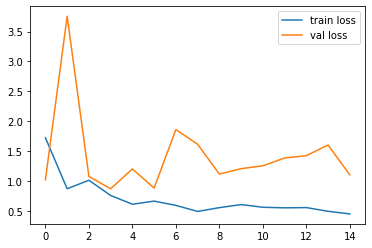

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

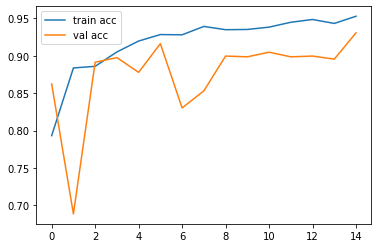

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.save('corninception.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

nmodel=load_model('corninception.h5')

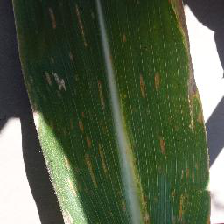

In [19]:
img=image.load_img('/content/drive/MyDrive/corn/Test/Gray_Leaf_Spot/Corn_Gray_Spot (479).JPG',target_size=(224,224))
img

In [20]:
x=image.img_to_array(img)
x


array([[[ 42.,  42.,  42.],
        [ 42.,  42.,  42.],
        [ 41.,  40.,  45.],
        ...,
        [ 46.,  41.,  45.],
        [ 45.,  40.,  44.],
        [ 44.,  39.,  43.]],

       [[ 42.,  42.,  42.],
        [ 42.,  42.,  42.],
        [ 41.,  40.,  45.],
        ...,
        [ 46.,  41.,  45.],
        [ 44.,  39.,  43.],
        [ 44.,  39.,  43.]],

       [[ 42.,  42.,  42.],
        [ 42.,  42.,  44.],
        [ 41.,  40.,  45.],
        ...,
        [ 45.,  40.,  44.],
        [ 44.,  39.,  43.],
        [ 43.,  38.,  42.]],

       ...,

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 251., 248.],
        ...,
        [255., 245., 251.],
        [255., 246., 252.],
        [255., 247., 253.]],

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 251., 248.],
        ...,
        [255., 228., 237.],
        [255., 226., 235.],
        [255., 225., 234.]],

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 2

In [21]:
x=x/255
x

array([[[0.16470589, 0.16470589, 0.16470589],
        [0.16470589, 0.16470589, 0.16470589],
        [0.16078432, 0.15686275, 0.1764706 ],
        ...,
        [0.18039216, 0.16078432, 0.1764706 ],
        [0.1764706 , 0.15686275, 0.17254902],
        [0.17254902, 0.15294118, 0.16862746]],

       [[0.16470589, 0.16470589, 0.16470589],
        [0.16470589, 0.16470589, 0.16470589],
        [0.16078432, 0.15686275, 0.1764706 ],
        ...,
        [0.18039216, 0.16078432, 0.1764706 ],
        [0.17254902, 0.15294118, 0.16862746],
        [0.17254902, 0.15294118, 0.16862746]],

       [[0.16470589, 0.16470589, 0.16470589],
        [0.16470589, 0.16470589, 0.17254902],
        [0.16078432, 0.15686275, 0.1764706 ],
        ...,
        [0.1764706 , 0.15686275, 0.17254902],
        [0.17254902, 0.15294118, 0.16862746],
        [0.16862746, 0.14901961, 0.16470589]],

       ...,

       [[1.        , 0.9843137 , 0.972549  ],
        [1.        , 0.9843137 , 0.972549  ],
        [1.        , 0

In [22]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
nmodel.predict(img_data)

array([[7.0273989e-17, 1.0000000e+00, 2.1139850e-12, 3.9834754e-11]],
      dtype=float32)

In [24]:
a=np.argmax(nmodel.predict(img_data), axis=1)

In [25]:
a==2

array([False])

In [26]:
a==1

array([ True])